# How Sunny is Seattle? 

This notebook is supplementary to the blog post that you can read [here](https://sarthakjariwala.github.io/blog/sunny-in-seattle)

## Imports

In [33]:
from nrel_dev_api import set_nrel_api_key
from nrel_dev_api.solar import (download_nsrdb_data,
                                get_nsrdb_download_links)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

sns.set(context="talk")

matplotlib.rcParams["figure.figsize"] = (12, 6)

%config InlineBackend.figure_format = 'retina'

## Set your NREL developer API key

To download the data programatically, we will need a [NREL Developer API key](https://developer.nrel.gov/signup/) - it is free and the signup only requires your name and email (where you will receive the API key).

In [2]:
NREL_API_KEY = os.environ.get("NREL_API_KEY")

set_nrel_api_key(NREL_API_KEY)

## Seattle, WA

Latitude = 47.61
Longitude = -122.35

First, check the avaialable links.

In [4]:
seattle_links = get_nsrdb_download_links(year=2016, interval=60, lat=47.61, lon=-122.35)
seattle_links

['https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?names=2016&wkt=POINT%28-122.35+47.61%29&interval=60&api_key=yourapikey&email=youremail']

In [5]:
seattle_hourly_df = download_nsrdb_data(seattle_links[0], email=os.environ.get("EMAIL"))

In [6]:
seattle_hourly_df.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm)
2016-01-01 00:00:00,2016,1,1,0,30,0,0,0,0,1,...,0,73.67,91.21,0.07,1020,0.432,101.8,0.8,0.0,0.0
2016-01-01 01:00:00,2016,1,1,1,30,-1,0,0,0,0,...,0,75.94,100.07,0.07,1020,0.419,90.7,0.7,0.0,0.0
2016-01-01 02:00:00,2016,1,1,2,30,-1,0,0,0,1,...,0,73.38,109.66,0.07,1020,0.408,89.5,0.6,0.0,0.0
2016-01-01 03:00:00,2016,1,1,3,30,-1,0,0,0,0,...,0,71.31,119.66,0.07,1020,0.398,88.4,0.5,0.0,0.0
2016-01-01 04:00:00,2016,1,1,4,30,-2,0,0,0,0,...,0,69.49,129.74,0.07,1020,0.392,86.8,0.4,0.0,0.0


In [7]:
seattle_ghi_monthly_sum = 1e-3 * seattle_hourly_df["GHI"].resample("M").sum()

seattle_ghi_monthly_sum # values are in kWh per m2 per month

2016-01-31     33.661
2016-02-29     49.141
2016-03-31     90.370
2016-04-30    154.304
2016-05-31    169.188
2016-06-30    198.978
2016-07-31    191.013
2016-08-31    180.028
2016-09-30    126.233
2016-10-31     61.287
2016-11-30     35.059
2016-12-31     45.311
Freq: M, Name: GHI, dtype: float64

## Boston, MA

Latitude = 42.36
Longitude = -71.06

In [8]:
boston_links = get_nsrdb_download_links(year=2016, interval=60, lat=42.36, lon=-71.06)
boston_links

['https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?names=2016&wkt=POINT%28-71.06+42.36%29&interval=60&api_key=yourapikey&email=youremail']

In [9]:
boston_hourly_df = download_nsrdb_data(link=boston_links[0], email=os.environ.get("EMAIL"))

In [10]:
boston_ghi_monthly_sum = 1e-3 * boston_hourly_df["GHI"].resample("M").sum()

boston_ghi_monthly_sum # values are in kWh per m2 per month

2016-01-31     64.608
2016-02-29     83.216
2016-03-31    119.618
2016-04-30    160.144
2016-05-31    174.102
2016-06-30    213.426
2016-07-31    199.640
2016-08-31    184.762
2016-09-30    124.293
2016-10-31     96.820
2016-11-30     61.626
2016-12-31     54.708
Freq: M, Name: GHI, dtype: float64

## Austin, TX

Latitude = 30.26
Longitude = -97.74

In [11]:
austin_links = get_nsrdb_download_links(year=2016, interval=60, lat=30.26, lon=-97.74)
austin_links

['https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?names=2016&wkt=POINT%28-97.74+30.26%29&interval=60&api_key=yourapikey&email=youremail']

In [12]:
austin_hourly_df = download_nsrdb_data(link=austin_links[0], email=os.environ.get("EMAIL"))

In [13]:
austin_ghi_monthyl_sum = 1e-3 * austin_hourly_df["GHI"].resample("M").sum()

austin_ghi_monthyl_sum # values are in kWh per m2 per month

2016-01-31    111.509
2016-02-29    135.596
2016-03-31    153.963
2016-04-30    162.074
2016-05-31    166.599
2016-06-30    211.531
2016-07-31    229.077
2016-08-31    187.451
2016-09-30    165.196
2016-10-31    152.188
2016-11-30     93.345
2016-12-31     71.597
Freq: M, Name: GHI, dtype: float64

### Aggregate solar resource data into a single dataframe

In [14]:
index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

ghi_df = pd.DataFrame(
    
    np.array([
        seattle_ghi_monthly_sum.values,
        boston_ghi_monthly_sum.values,
        austin_ghi_monthyl_sum.values
    ]).T,
    columns=["Seattle", "Boston", "Austin"],
    index=index
)

In [15]:
ghi_df # kWh/m2 per month

,Seattle,Boston,Austin
Jan,33.661,64.608,111.509
Feb,49.141,83.216,135.596
Mar,90.370,119.618,153.963
Apr,154.304,160.144,162.074
May,169.188,174.102,166.599
Jun,198.978,213.426,211.531
Jul,191.013,199.640,229.077
Aug,180.028,184.762,187.451
Sep,126.233,124.293,165.196
Oct,61.287,96.820,152.188


## Berlin, Germany

NSRDB doesn't have data for Berlin but we can get it from [PVGIS](https://re.jrc.ec.europa.eu/pvg_tools/en/#MR), a tool provided by the European Union science hub.

In [41]:
berlin_monthly_df = (pd.read_csv("Monthlydata_52.516_13.377_SA_2016_2016.csv", sep="\t", skiprows=4, skipfooter=4)
                     .dropna(axis=1)
                     .rename(columns={"H(h)_m" : "monthly_ghi_kWh_m2"})
                    )

<ipython-input-41-33cf1f9a3c79>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  berlin_monthly_df = (pd.read_csv("Monthlydata_52.516_13.377_SA_2016_2016.csv", sep="\t", skiprows=4, skipfooter=4)


In [42]:
berlin_monthly_df

,year,month,monthly_ghi_kWh_m2
0,2016,Jan,16.03
1,2016,Feb,37.93
2,2016,Mar,64.28
3,2016,Apr,120.44
4,2016,May,182.66
5,2016,Jun,173.66
6,2016,Jul,151.20
7,2016,Aug,142.08
8,2016,Sep,117.23
9,2016,Oct,40.18


### Add Berlin to the dataframe

In [20]:
ghi_df["Berlin"] = berlin_monthly_df["monthly_ghi_kWh_m2"].values
ghi_df

,Seattle,Boston,Austin,Berlin
Jan,33.661,64.608,111.509,16.03
Feb,49.141,83.216,135.596,37.93
Mar,90.370,119.618,153.963,64.28
Apr,154.304,160.144,162.074,120.44
May,169.188,174.102,166.599,182.66
Jun,198.978,213.426,211.531,173.66
Jul,191.013,199.640,229.077,151.20
Aug,180.028,184.762,187.451,142.08
Sep,126.233,124.293,165.196,117.23
Oct,61.287,96.820,152.188,40.18


## Compare solar resource availability across cities

Text(0.5, 1.0, 'Global Horizontal Irradiance')

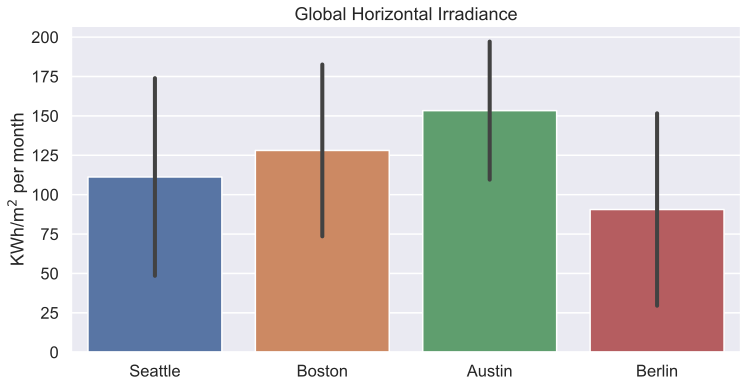

In [53]:
ax = sns.barplot(data=ghi_df, ci="sd")

ax.set_ylabel("KWh/m$^{2}$ per month")
ax.set_title("Global Horizontal Irradiance")

# plt.savefig("Monthly_GHI_mean_w_sd.png", dpi=300, bbox_inches="tight")

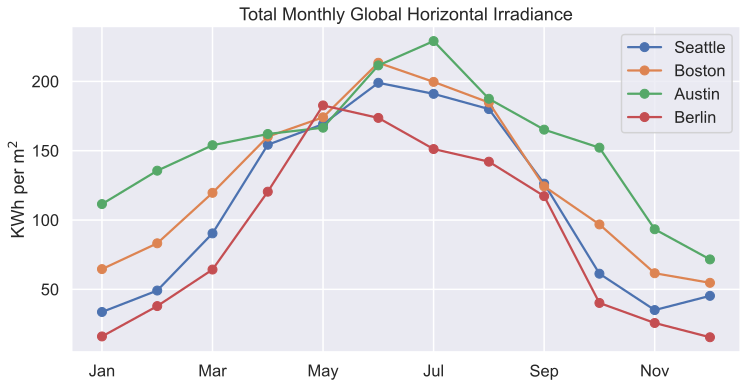

In [54]:
ax = ghi_df.plot(
    kind="line",
    ylabel="KWh per m$^{2}$",
    title="Total Monthly Global Horizontal Irradiance",
    style=["o-", "o-", "o-", "o-"]
)
# plt.savefig("Monthly_GHI_linplot.png", dpi=300, bbox_inches="tight")

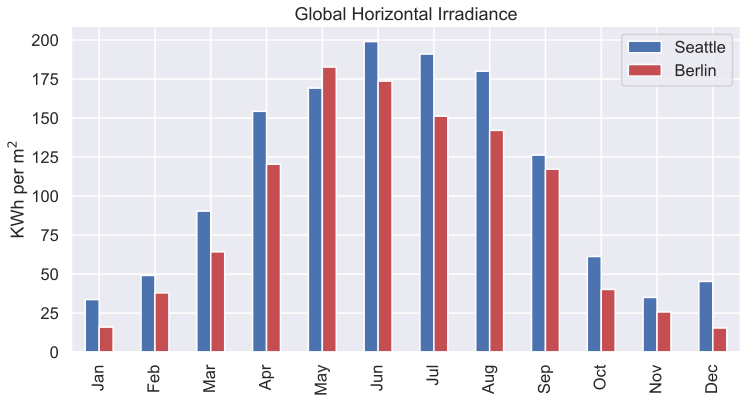

In [55]:
ax = ghi_df[['Seattle', 'Berlin']].plot(kind="bar", color=["C0", "C3"])

ax.set_ylabel("KWh per m$^{2}$")
ax.set_title("Global Horizontal Irradiance")
ax.legend(["Seattle", "Berlin"]);

# plt.savefig("Seattle_vs_Berlin_GHI_2016.png", dpi=300, bbox_inches="tight")

## Yearly sum of Global Horizontal Irradiance

In [49]:
ghi_df.sum() # yearly sum kWh/m2

Seattle    1334.573
Boston     1536.963
Austin     1840.126
Berlin     1086.870
dtype: float64